In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [36]:
dataset = pd.read_csv("covid/covid_19_data.csv", index_col=0)
dataset.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [32]:
def date_format(date):
    month = ''
    for i in date:
        if i == "/" :
            break
        else:
            month += i
    return month

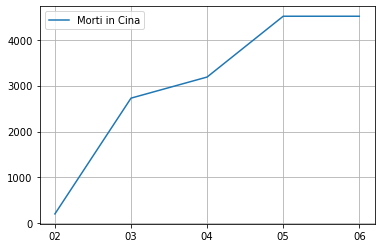

In [74]:
x, y = [], [] # sulla x ci saranno le date e sulla y il numero di morti
data_precedente = ''
count = []

# iterazione per tutte le righe del database
for index, row in dataset.iterrows():
    # solo se il paese è la cina, in modo da analizzare solo quel paese.
    if row["Country/Region"] == "Mainland China":
        data_interessata = date_format(row["ObservationDate"]) # formattare la data come serve a noi
        if data_precedente == '':
            data_precedente = data_interessata
        elif data_interessata == data_precedente:
            count.append(row["Deaths"])
        else:
            data_precedente = data_interessata
            x.append(data_interessata)
            y.append(np.max(count))
            count = []
            
plt.plot(x, y, label="Morti in Cina")
plt.legend(loc="best")
plt.grid()
plt.show()

In [76]:
lista_confermati = []
for index, row in dataset.iterrows():
    if row["Country/Region"] == "Mainland China":
        lista_confermati.append(row["Confirmed"])
confermati = np.max(lista_confermati)
print(f"Il numero dei casi confermati è {confermati}")

Il numero dei casi confermati è 68135.0
